# COMPUTER GAMES IN 1980-2020: ANNUAL SALES
## Data analysis & visualization

#### Data Description 

* `Rank` - rank number (ordered)
* `Name` - game
* `Platform` - game's platform 
* `Year` - year when released
* `Genre` - genre
* `Publisher` - game's publisher
* `NA_Sales` - sales in North America, millions of copies
* `EU_Sales` - sales in Europe, millions of copies
* `JP_Sales` - sales in Japan, millions of copies
* `Other_Sales` - sales in other countries, millions of copies
* `Global_Sales` - global sales, millions of copies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

**IMPORTING DATA**

In [2]:
# Raw data - first look
df = pd.read_csv('data.csv')
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


### 1 - 'Sports' genre sales in Japan - linear plot, by year, 1980-2020

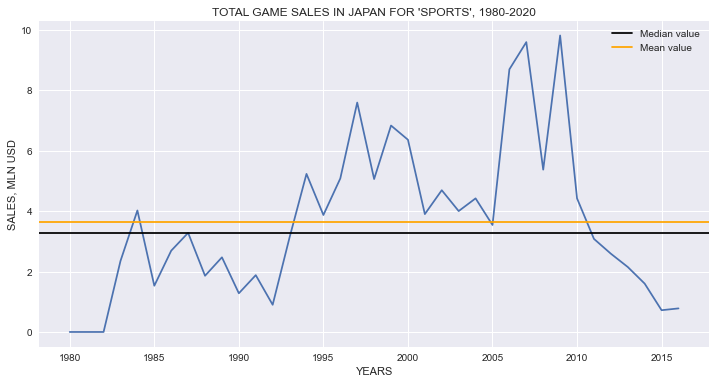

In [3]:
# Framing data
sales_sports_Japan = df[df['Genre'] == 'Sports'].groupby('Year').sum()['JP_Sales']

# Instantiating Figure & Axes classes - now we have a plot and a sublpot
fi, ax0 = plt.subplots(figsize = (12,6))

# Filling the subplot with lines
ax0.plot(sales_sports_Japan)
ax0.set_title("total game sales in japan for 'sports', 1980-2020".upper())
ax0.set_xlabel('years'.upper())
ax0.set_ylabel('sales, mln usd'.upper())
ax0.axhline(sales_sports_Japan.median(), color = 'black', label = 'Median value')
ax0.axhline(sales_sports_Japan.mean(), color = 'orange', label = 'Mean value')

# Let's show!
ax0.legend()
plt.show()

### 2 - 'Activision' Sales 
#### North America, Europe, Japan, globally 
##### by year, 1980-2020

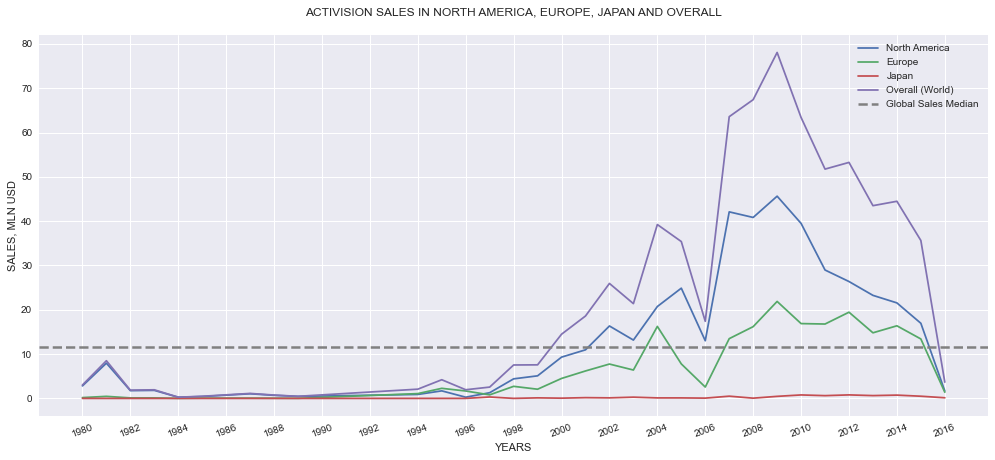

In [4]:
fig, ax = plt.subplots(figsize = (17,7))

look_for = [{'NA_Sales': None, 'label': 'North America'}, 
            {'EU_Sales': None, 'label': 'Europe'},
            {'JP_Sales': None, 'label': 'Japan'}, 
            {'Global_Sales': None, 'label': 'Overall (World)'}]


             
for a in look_for:

    a[f'{list(a.keys())[0]}'] = df[df['Publisher'] == 'Activision'].groupby('Year').sum()[f'{list(a.keys())[0]}']


    ax.plot(a[f'{list(a.keys())[0]}'].index, 
            a[f'{list(a.keys())[0]}'], 
            label = a[f'{list(a.keys())[1]}'])


bins_width = (look_for[0]['NA_Sales'].index.max() - look_for[0]['NA_Sales'].index.min())/18
xticks = [look_for[0]['NA_Sales'].index.min() + i*float(bins_width) for i in range(19)]
ax.set_xticks(xticks)


ax.set_title('Activision Sales in North America, Europe, Japan and overall'.upper(), pad = 20)
ax.set_xlabel('Years'.upper())
ax.set_ylabel('Sales, mln USD'.upper())
ax.axhline(look_for[3]['Global_Sales'].median(), color = 'grey', label = 'Global Sales Median', linestyle = '--', linewidth='2.5')
ax.tick_params(axis = 'x', rotation = 20)

# Let's show!
ax.legend()   
plt.show()

### 3 - 'Activision' Sales 
#### by region 
##### 1980-2020

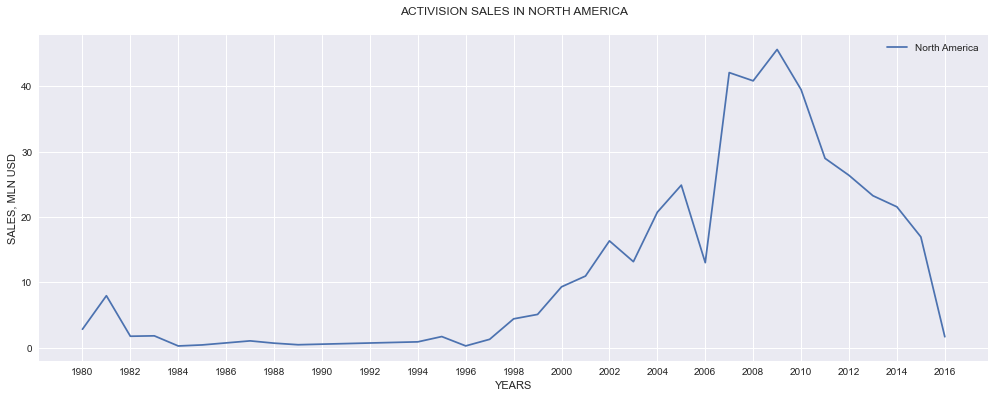

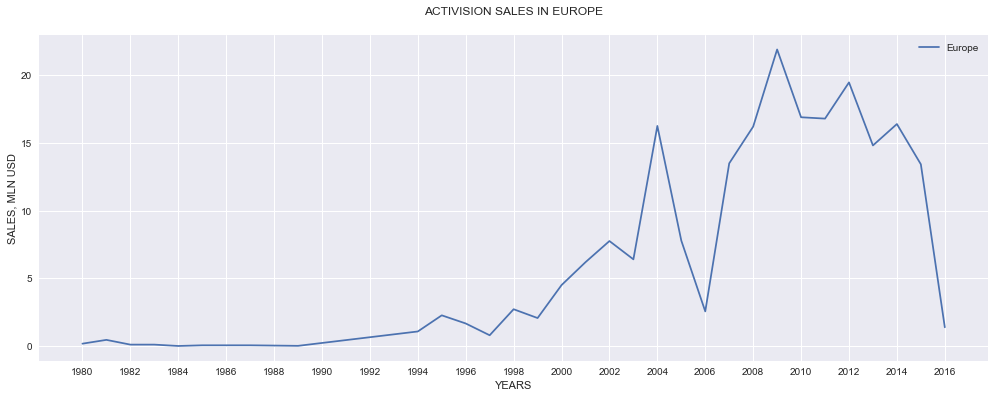

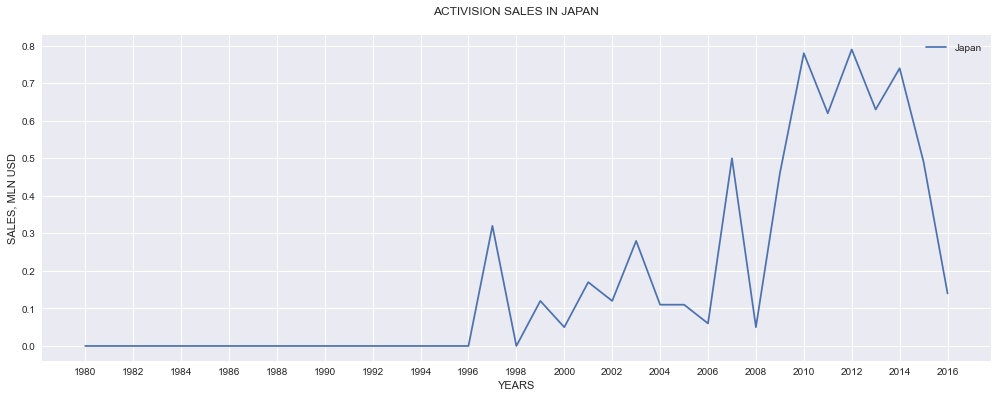

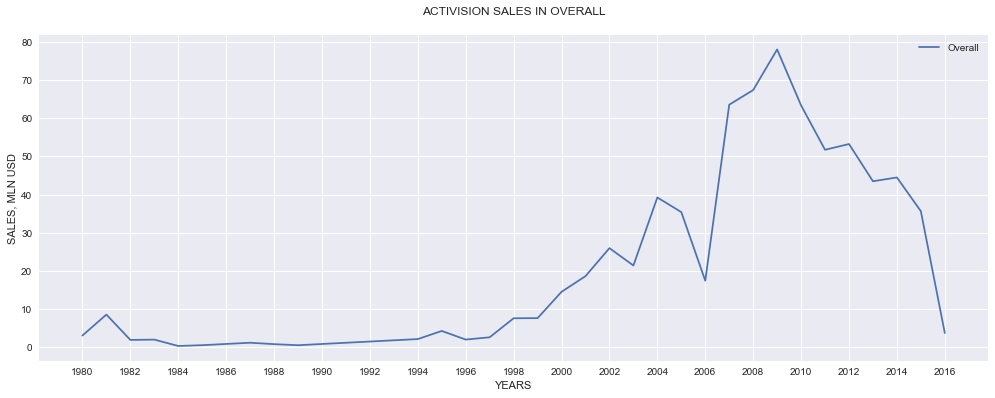

In [5]:
regions = [{'region': look_for[0]['NA_Sales'], 'label': 'North America', 'i': 0, 'j': 0}, 
                {'region': look_for[1]['EU_Sales'], 'label': 'Europe', 'i': 0, 'j': 1}, 
                {'region': look_for[2]['JP_Sales'], 'label': 'Japan', 'i': 1, 'j': 0}, 
                {'region': look_for[3]['Global_Sales'], 'label': 'Overall', 'i': 1, 'j': 1}]
                
    
for region in regions:

    fig, ax = plt.subplots(figsize = (17,6))
    
    ax.plot(region['region'].index, region['region'], label = region['label'])
    
    bins_width = (region['region'].index.max() - region['region'].index.min())/18
    xticks = [region['region'].index.min() + i*float(bins_width) for i in range(19)]
    ax.set_xticks(xticks)
    
    ax.set_title(f"Activision Sales in {region['label']}".upper(), pad = 20)
    ax.set_xlabel('Years'.upper())
    ax.set_ylabel('Sales, mln USD'.upper())
    ax.legend()

#     Let's show!
plt.show()

**Key outlines**: 
<br> 1998 - current - game sales are growing up due to high-speed spread of gadgets in all the regions
<br> Formiddable growth can also be associated with new graphic technologies coming to games

### 4 - 'Activision Sales' - four plots (for comparison)

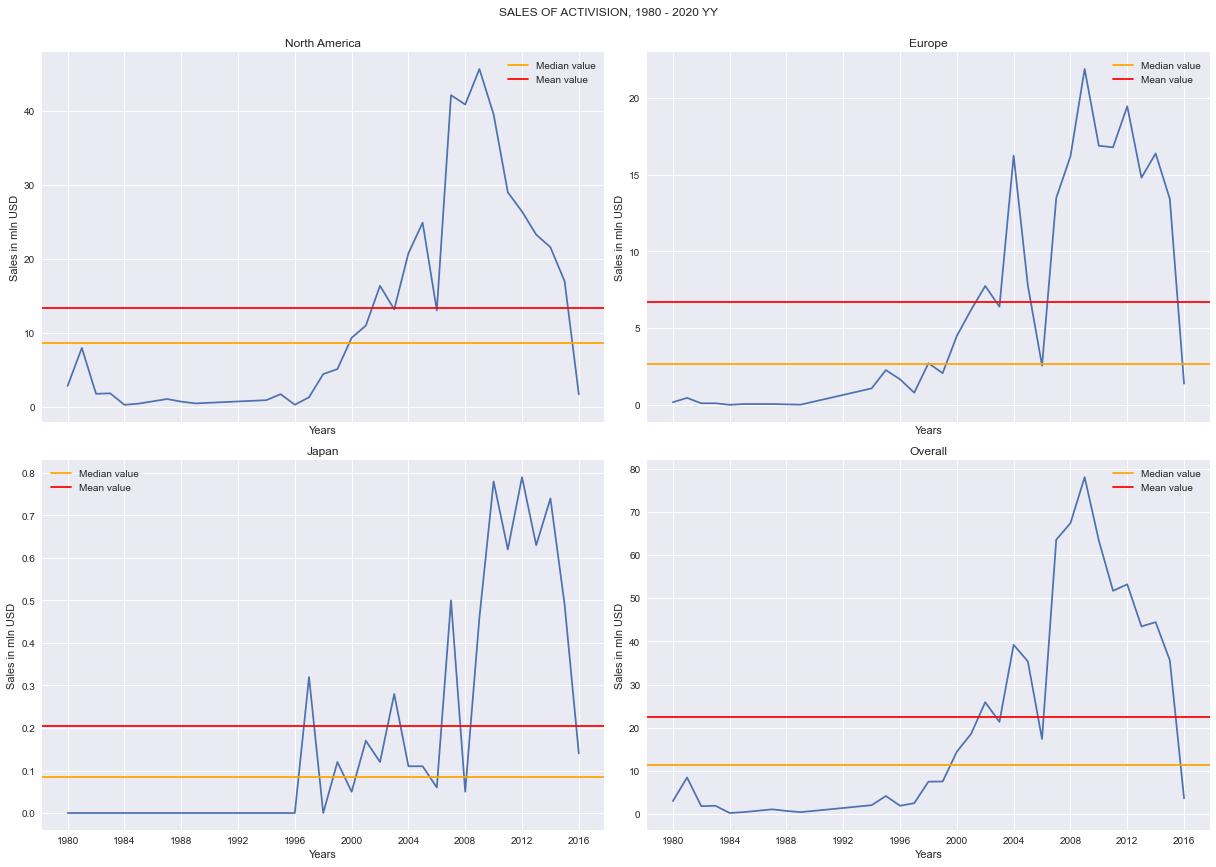

In [6]:
figure, axes = plt.subplots(nrows = 2, ncols = 2, sharex = True, figsize = (17, 12))

for reg in regions: 
    axes[reg['i'], reg['j']].plot(reg['region'].index, reg['region'])
    axes[reg['i'], reg['j']].set_title(reg['label'])
    axes[reg['i'], reg['j']].axhline(reg['region'].median(), color = 'orange', label = 'Median value')
    axes[reg['i'], reg['j']].axhline(reg['region'].mean(), color = 'red', label = 'Mean value')

for ax in axes: 
    for ax_ax in ax: 
        ax_ax.set_xlabel('Years')
        ax_ax.set_ylabel('Sales in mln USD')
        
        bins_width = (look_for[0]['NA_Sales'].index.max() - look_for[0]['NA_Sales'].index.min())/9
        xticks = [look_for[0]['NA_Sales'].index.min() + i*float(bins_width) for i in range(10)]
        
        ax_ax.set_xticks(xticks)
        ax_ax.legend()

figure.suptitle('sales of Activision, 1980 - 2020 yy'.upper(), y = 1)
figure.tight_layout()
plt.show()

### 5 - 'Microsoft Game Studios' & 'Take-Two Interactive' sales distribution, 1980-2020

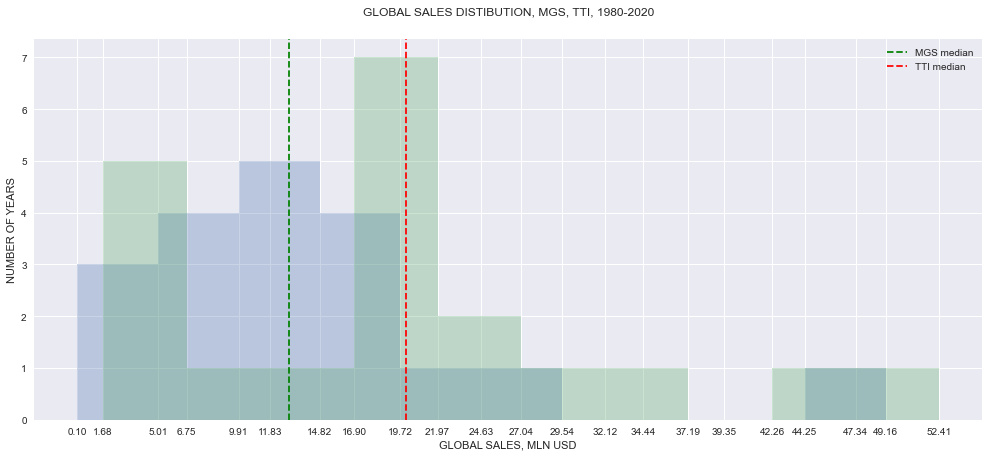

In [7]:
sales_g_MGS = df[df['Publisher'] == 'Microsoft Game Studios'].groupby('Year').sum()['Global_Sales']
sales_g_TTI = df[df['Publisher'] == 'Take-Two Interactive'].groupby('Year').sum()['Global_Sales']
 
figure, axes = plt.subplots(figsize = (17, 7))

x_ticks = []

for item in [sales_g_MGS, sales_g_TTI]:
    _, bins, _ = axes.hist(item, alpha = 0.3, bins = 10)
    x_ticks += list(bins)

axes.set_xticks(x_ticks)
axes.set_title('Global sales distibution, MGS, TTI, 1980-2020'.upper(), pad = 25)
axes.set_xlabel('Global Sales, mln USD'.upper())
axes.set_ylabel('Number of years'.upper())

axes.axvline(sales_g_MGS.mean(), color = 'green', linestyle = '--',  label = f'MGS median')
axes.axvline(sales_g_TTI.median(), color = 'red', linestyle = '--',  label = f'TTI median')

#  Let's show
axes.legend()
plt.show()

### Sales in Japan - platforms of best-selling games, 1980-2020
#### by year

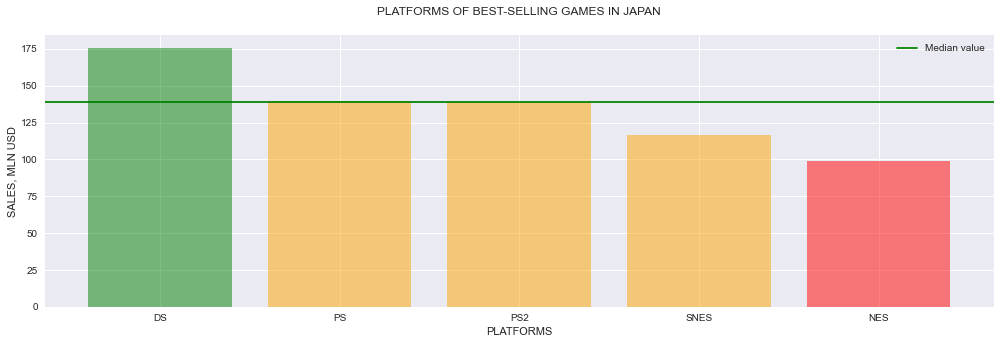

In [8]:
platforms = df[['Platform', 'JP_Sales']].groupby('Platform').sum().sort_values('JP_Sales', ascending = False).head(5)
platforms['color'] = 'orange'
platforms.loc[platforms['JP_Sales'] == platforms['JP_Sales'].max(), 'color'] = 'green'
platforms.loc[platforms['JP_Sales'] == platforms['JP_Sales'].min(), 'color'] = 'red'


figure2, ax2 = plt.subplots(figsize = (17,5))

ax2.bar(platforms.index, platforms['JP_Sales'], color = platforms['color'], alpha = 0.5)
ax2.axhline(platforms['JP_Sales'].median(), color = 'green', label = 'Median value')
ax2.set_title('Platforms of best-selling games in Japan'.upper(), pad = 20)
ax2.set_xlabel('Platforms'.upper())
ax2.set_ylabel('Sales, mln USD'.upper())

# Let's show
ax2.legend()
plt.show()

### Sales of 'Nintendo' - by year

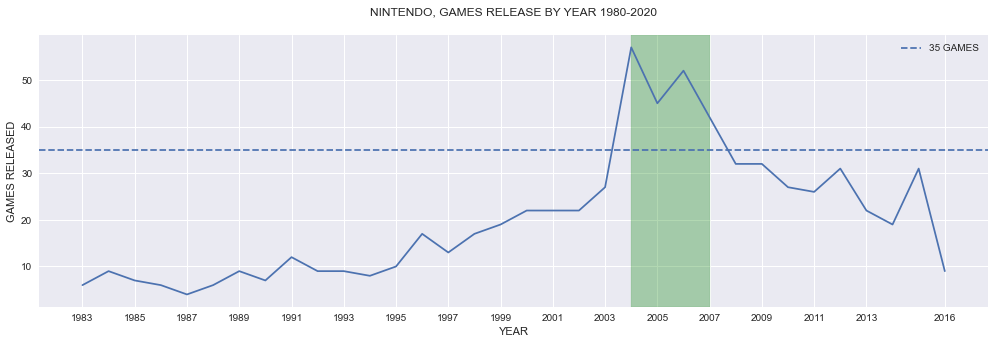

In [10]:
df['Sum'] = 1
 
sales_Nin = df[df['Publisher'] == 'Nintendo'][['Name', 'Year', 'Sum']]

sales_Nin_new = sales_Nin.drop_duplicates() 

sales_Nin_grouped = sales_Nin_new.groupby('Year').sum()

min_35 = sales_Nin_grouped[sales_Nin_grouped['Sum'] > 35].index.min()
data_max = sales_Nin_grouped[sales_Nin_grouped['Sum'] > 35].index.max()

fg_l, ax_l = plt.subplots(figsize = (17, 5))

sns.lineplot(data = sales_Nin_grouped, 
             x = 'Year',
             y  = 'Sum')

ax_l.set_title('Nintendo, Games release by year 1980-2020'.upper(), pad = 20)
ax_l.set_xlabel('Year'.upper())
ax_l.set_ylabel('Games released'.upper())

# Добавление прямоугольника
ax_l.axvspan(xmin = min_35, xmax = data_max, color = 'green', alpha = 0.3)
ax_l.axhline(35, linestyle = '--', label = '35 games'.upper())

# Переопределение оси Х
bins_width = (sales_Nin_grouped.index.max() - sales_Nin_grouped.index.min())/16
ax_l.set_xticks([int(sales_Nin_grouped.index.min()) + int(i*bins_width) for i in range(17)])

# Показ
ax_l.legend()
plt.show()

In [19]:
sales_Genre_3 = df.groupby('Genre').sum()[['NA_Sales', 'Global_Sales']].sort_values('Global_Sales', ascending = False).head(3)
print(f"\n\n{'sales for three best-selling genres'.upper()}\n\n{sales_Genre_3}")
sales_Platforms_4 = df.groupby('Platform').sum()[['NA_Sales', 'Global_Sales']].sort_values('Global_Sales', ascending = False).head(4)
print(f"\n\n{'sales for four best-selling platforms'.upper()}\n\n{sales_Platforms_4}")



SALES FOR THREE BEST-SELLING GENRES

         NA_Sales  Global_Sales
Genre                          
Action     877.83       1751.18
Sports     683.35       1330.93
Shooter    582.60       1037.37


SALES FOR FOUR BEST-SELLING PLATFORMS

          NA_Sales  Global_Sales
Platform                        
PS2         583.84       1255.64
X360        601.05        979.96
PS3         392.26        957.84
Wii         507.71        926.71


In [20]:
sales_final = df[(df['Platform'].isin(list(sales_Platforms_4.index))) & (df['Genre'].isin(list(sales_Genre_3.index)))][['Platform', 'Genre', 'NA_Sales', 'Global_Sales']]
sales_final

,Platform,Genre,NA_Sales,Global_Sales
0,Wii,Sports,41.49,82.74
3,Wii,Sports,15.75,33.00
13,Wii,Sports,8.94,22.72
14,Wii,Sports,9.09,22.00
16,PS3,Action,7.01,21.40
...,...,...,...,...
16458,Wii,Action,0.00,0.01
16476,X360,Shooter,0.00,0.01
16517,Wii,Action,0.00,0.01
16533,X360,Action,0.00,0.01


NORTH AMERICA (X) - WORLD (Y) SALES CORRELATIONS FOR BEST-SELLING PLATFORMS AND GENRES


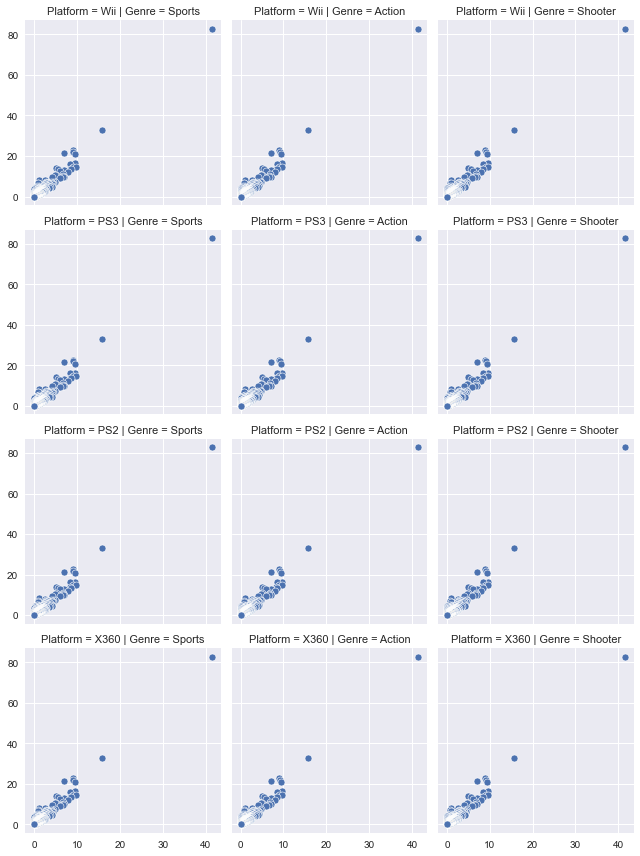

In [22]:
print('North America (x) - World (y) sales correlations for best-selling platforms and genres'.upper())
sns.FacetGrid(data = sales_final, row = 'Platform', col = 'Genre').map(sns.scatterplot, x = sales_final['NA_Sales'], y = sales_final['Global_Sales'])
plt.show()